### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB,CategoricalNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score as f1_score_func
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from plotingfun import *
from helper_functions import *

<h1><b>Data Loading and Pre-Processing

In [3]:
classes={"Positive","Negative"}

In [4]:
#Reading the data from the csv file and storing it in the data variable.
data=pd.read_csv("CE802_P2_Data.csv")

In [5]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,8764.06,1,3717.58,-10.7380,14.4930,1,12.6741,-12.4365,1.72,-1482.465,...,-11.5060,16.09200,-67.900,-2550.500,-89155.020,-7.152582,6042.44,2.0901,29.54,False
1,8211.86,1,3751.52,-11.8840,9.8217,1,11.6628,-17.3760,1.72,-1468.200,...,-15.4060,13.28490,-64.010,-3162.360,-89173.260,-11.619000,6978.64,3.5904,29.84,False
2,9102.86,1,3854.70,-12.4960,10.1253,0,13.6770,-14.8380,1.72,-1502.640,...,-15.6360,14.10600,-42.869,-3034.600,-89230.732,-17.016000,6943.18,9.1950,NaN,False
3,8475.78,1,3701.94,-11.2900,13.7460,1,21.6570,-11.3466,0.72,-1521.630,...,-9.6220,15.16260,-38.565,-3166.080,-89420.240,-7.213530,6813.24,3.9912,28.76,False
4,11462.86,0,3723.06,-12.5080,13.2660,0,16.4820,-12.6738,1.72,-1738.780,...,-15.8700,12.69240,-38.522,-2990.880,-89195.000,-8.917800,7009.94,1.9818,27.24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8159.26,0,3879.29,-10.0188,9.8793,1,14.9790,-12.2115,1.72,-1776.880,...,-8.5920,13.33590,-42.616,-3085.506,-89270.940,-7.150701,6543.44,3.2379,NaN,True
996,7245.26,1,4058.28,-9.0320,9.9033,0,11.9994,-15.7740,1.72,-1583.190,...,-8.0492,12.73530,-69.890,-3117.636,-89221.506,-7.964100,6798.28,4.3944,33.80,True
997,8650.38,0,3749.33,-8.7740,13.2300,0,13.2360,-12.2157,0.72,-1496.400,...,-8.3344,14.88990,-53.950,-2851.300,-89205.440,-7.294140,6387.64,2.4336,29.86,False
998,8558.18,0,3969.78,-10.2878,9.9126,0,10.6359,-15.8220,0.72,-1594.680,...,-7.6860,14.20260,-40.848,-3044.880,-89068.220,-7.297950,2985.04,6.5580,NaN,True


In [6]:
#Getting all the column names
for i in data.columns:
    print(i)

F1
F2
F3
F4
F5
F6
F7
F8
F9
F10
F11
F12
F13
F14
F15
F16
F17
F18
F19
F20
Class


In [7]:
# using The pandas profiling pacage to get an genral idea about the data set

profile = ProfileReport(data, title="CE802_P2_Data", html={"style":{"full_width":True}})

In [8]:
#profile.to_notebook_iframe()

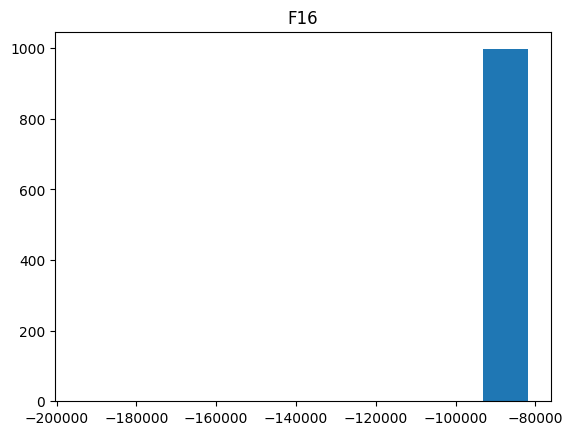

In [9]:
plt.hist(data["F16"])
plt.title("F16")
plt.show()

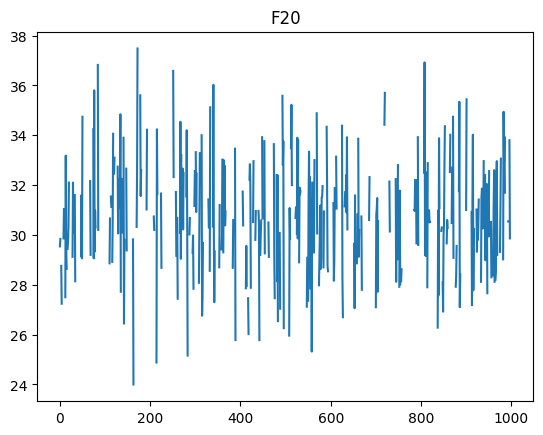

In [10]:
plt.plot(data["F20"])
plt.title("F20")
plt.show()


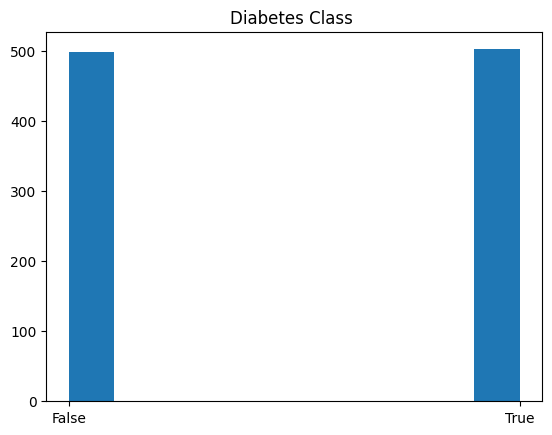

The Data is quite balance with 

 True     502
False    498
Name: Class, dtype: int64


In [11]:
plt.hist(data["Class"].astype(str))
plt.title("Diabetes Class ")
plt.show()
print(f"The Data is quite balance with \n\n",data["Class"].value_counts())

In [12]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,8764.06,1,3717.58,-10.7380,14.4930,1,12.6741,-12.4365,1.72,-1482.465,...,-11.5060,16.09200,-67.900,-2550.500,-89155.020,-7.152582,6042.44,2.0901,29.54,False
1,8211.86,1,3751.52,-11.8840,9.8217,1,11.6628,-17.3760,1.72,-1468.200,...,-15.4060,13.28490,-64.010,-3162.360,-89173.260,-11.619000,6978.64,3.5904,29.84,False
2,9102.86,1,3854.70,-12.4960,10.1253,0,13.6770,-14.8380,1.72,-1502.640,...,-15.6360,14.10600,-42.869,-3034.600,-89230.732,-17.016000,6943.18,9.1950,NaN,False
3,8475.78,1,3701.94,-11.2900,13.7460,1,21.6570,-11.3466,0.72,-1521.630,...,-9.6220,15.16260,-38.565,-3166.080,-89420.240,-7.213530,6813.24,3.9912,28.76,False
4,11462.86,0,3723.06,-12.5080,13.2660,0,16.4820,-12.6738,1.72,-1738.780,...,-15.8700,12.69240,-38.522,-2990.880,-89195.000,-8.917800,7009.94,1.9818,27.24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8159.26,0,3879.29,-10.0188,9.8793,1,14.9790,-12.2115,1.72,-1776.880,...,-8.5920,13.33590,-42.616,-3085.506,-89270.940,-7.150701,6543.44,3.2379,NaN,True
996,7245.26,1,4058.28,-9.0320,9.9033,0,11.9994,-15.7740,1.72,-1583.190,...,-8.0492,12.73530,-69.890,-3117.636,-89221.506,-7.964100,6798.28,4.3944,33.80,True
997,8650.38,0,3749.33,-8.7740,13.2300,0,13.2360,-12.2157,0.72,-1496.400,...,-8.3344,14.88990,-53.950,-2851.300,-89205.440,-7.294140,6387.64,2.4336,29.86,False
998,8558.18,0,3969.78,-10.2878,9.9126,0,10.6359,-15.8220,0.72,-1594.680,...,-7.6860,14.20260,-40.848,-3044.880,-89068.220,-7.297950,2985.04,6.5580,NaN,True


From the following report we can have following conclusion<br>
There are high correlations between the following feature pairs:<br>

F1 and F15<br>
F3 and F11<br>
F11 and F3 (which is the same as F3 and F11)<br>
F15 and F1 (which is the same as F1 and F15)<br>
F20 and Class<br>
Class and F20 (which is the same as F20 and Class)<br>
F20 has 50% missing values (500 out of 1000).<br>

F16 is highly skewed with a skewness value (γ1) of -30.53867041, indicating a left-skewed distribution.<br>

In [13]:
#filling missing values using knn
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data)
imputed_data = pd.DataFrame(imputed_data, columns=data.columns)


In [14]:
imputed_data["Class"].value_counts()

1.0    502
0.0    498
Name: Class, dtype: int64

In [15]:
data["Class"].value_counts()

True     502
False    498
Name: Class, dtype: int64

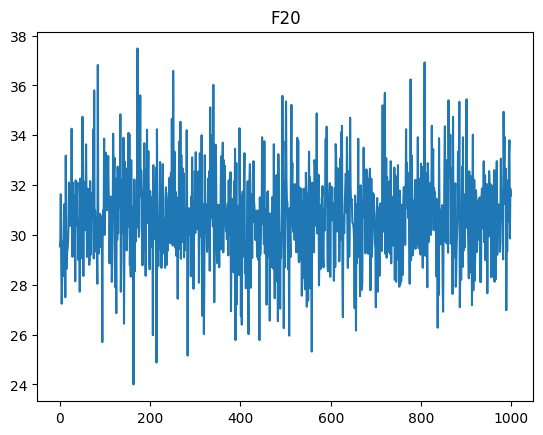

In [16]:
plt.plot(imputed_data["F20"])
plt.title("F20")
plt.show()


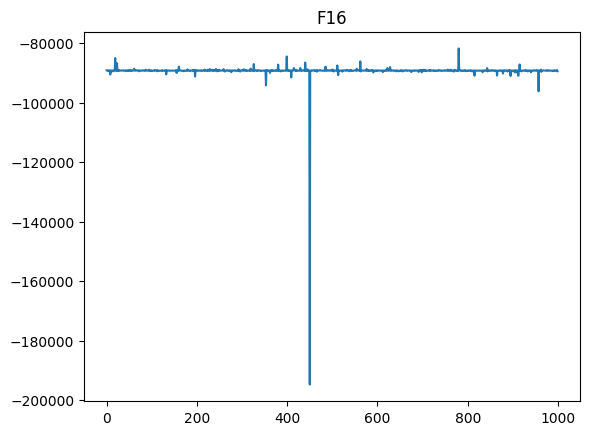

In [17]:
plt.plot(imputed_data["F16"])
plt.title("F16")
plt.show()


In [18]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,8764.06,1,3717.58,-10.7380,14.4930,1,12.6741,-12.4365,1.72,-1482.465,...,-11.5060,16.09200,-67.900,-2550.500,-89155.020,-7.152582,6042.44,2.0901,29.54,False
1,8211.86,1,3751.52,-11.8840,9.8217,1,11.6628,-17.3760,1.72,-1468.200,...,-15.4060,13.28490,-64.010,-3162.360,-89173.260,-11.619000,6978.64,3.5904,29.84,False
2,9102.86,1,3854.70,-12.4960,10.1253,0,13.6770,-14.8380,1.72,-1502.640,...,-15.6360,14.10600,-42.869,-3034.600,-89230.732,-17.016000,6943.18,9.1950,NaN,False
3,8475.78,1,3701.94,-11.2900,13.7460,1,21.6570,-11.3466,0.72,-1521.630,...,-9.6220,15.16260,-38.565,-3166.080,-89420.240,-7.213530,6813.24,3.9912,28.76,False
4,11462.86,0,3723.06,-12.5080,13.2660,0,16.4820,-12.6738,1.72,-1738.780,...,-15.8700,12.69240,-38.522,-2990.880,-89195.000,-8.917800,7009.94,1.9818,27.24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8159.26,0,3879.29,-10.0188,9.8793,1,14.9790,-12.2115,1.72,-1776.880,...,-8.5920,13.33590,-42.616,-3085.506,-89270.940,-7.150701,6543.44,3.2379,NaN,True
996,7245.26,1,4058.28,-9.0320,9.9033,0,11.9994,-15.7740,1.72,-1583.190,...,-8.0492,12.73530,-69.890,-3117.636,-89221.506,-7.964100,6798.28,4.3944,33.80,True
997,8650.38,0,3749.33,-8.7740,13.2300,0,13.2360,-12.2157,0.72,-1496.400,...,-8.3344,14.88990,-53.950,-2851.300,-89205.440,-7.294140,6387.64,2.4336,29.86,False
998,8558.18,0,3969.78,-10.2878,9.9126,0,10.6359,-15.8220,0.72,-1594.680,...,-7.6860,14.20260,-40.848,-3044.880,-89068.220,-7.297950,2985.04,6.5580,NaN,True


In [19]:
#For baseline Filling NaN with zeros
data=data.fillna(0)

In [20]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,8764.06,1,3717.58,-10.7380,14.4930,1,12.6741,-12.4365,1.72,-1482.465,...,-11.5060,16.09200,-67.900,-2550.500,-89155.020,-7.152582,6042.44,2.0901,29.54,False
1,8211.86,1,3751.52,-11.8840,9.8217,1,11.6628,-17.3760,1.72,-1468.200,...,-15.4060,13.28490,-64.010,-3162.360,-89173.260,-11.619000,6978.64,3.5904,29.84,False
2,9102.86,1,3854.70,-12.4960,10.1253,0,13.6770,-14.8380,1.72,-1502.640,...,-15.6360,14.10600,-42.869,-3034.600,-89230.732,-17.016000,6943.18,9.1950,0.00,False
3,8475.78,1,3701.94,-11.2900,13.7460,1,21.6570,-11.3466,0.72,-1521.630,...,-9.6220,15.16260,-38.565,-3166.080,-89420.240,-7.213530,6813.24,3.9912,28.76,False
4,11462.86,0,3723.06,-12.5080,13.2660,0,16.4820,-12.6738,1.72,-1738.780,...,-15.8700,12.69240,-38.522,-2990.880,-89195.000,-8.917800,7009.94,1.9818,27.24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8159.26,0,3879.29,-10.0188,9.8793,1,14.9790,-12.2115,1.72,-1776.880,...,-8.5920,13.33590,-42.616,-3085.506,-89270.940,-7.150701,6543.44,3.2379,0.00,True
996,7245.26,1,4058.28,-9.0320,9.9033,0,11.9994,-15.7740,1.72,-1583.190,...,-8.0492,12.73530,-69.890,-3117.636,-89221.506,-7.964100,6798.28,4.3944,33.80,True
997,8650.38,0,3749.33,-8.7740,13.2300,0,13.2360,-12.2157,0.72,-1496.400,...,-8.3344,14.88990,-53.950,-2851.300,-89205.440,-7.294140,6387.64,2.4336,29.86,False
998,8558.18,0,3969.78,-10.2878,9.9126,0,10.6359,-15.8220,0.72,-1594.680,...,-7.6860,14.20260,-40.848,-3044.880,-89068.220,-7.297950,2985.04,6.5580,0.00,True


In [21]:
#Creating a new variable called y for labels and assigning it the values of the column "Class" in the dataframe data.
y=data["Class"]
#Creating a new variable called X for rest of the features and droping class.
X=data.drop("Class",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [23]:
#Creating a new variable called y for labels and assigning it the values of the column "Class" in the dataframe data.
y_modified=imputed_data["Class"]
#Creating a new variable called X for rest of the features and droping class.
X_modified=imputed_data.drop("Class",axis=1)
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(X_modified, y_modified, random_state=42,test_size=0.2)

In [24]:
y_train_modified

29     1.0
535    1.0
695    1.0
557    1.0
836    1.0
      ... 
106    1.0
270    0.0
860    0.0
435    1.0
102    0.0
Name: Class, Length: 800, dtype: float64

In [25]:
X_train_modified.shape, X_test_modified.shape, y_train_modified.shape, y_test_modified.shape

((800, 20), (200, 20), (800,), (200,))

<b><h1>Model 0  Random Forrest

BASLINE MODEL( all Nans are filled with 0)

In [26]:
model0=make_pipeline(StandardScaler(),RandomForestClassifier())

In [27]:
baseline_accuracy=cross_val_score(model0, X_train, y_train, cv=10)
print(f"The Baseline Accuracy of Random Foreest Model is {np.mean(baseline_accuracy)*100:.2f}")

The Baseline Accuracy of Random Foreest Model is 84.62


In [28]:
model0.fit(X_train, y_train)
pred=model0.predict(X_test)
model0_baseline_score=modelscore2(y_true=y_test,y_pred=pred,average="binary")
model0_baseline_score

{'Accuracy': 89.5,
 'f1-score': 0.9023255813953489,
 'Recall': 0.8981481481481481,
 'Precision': 0.9065420560747663}

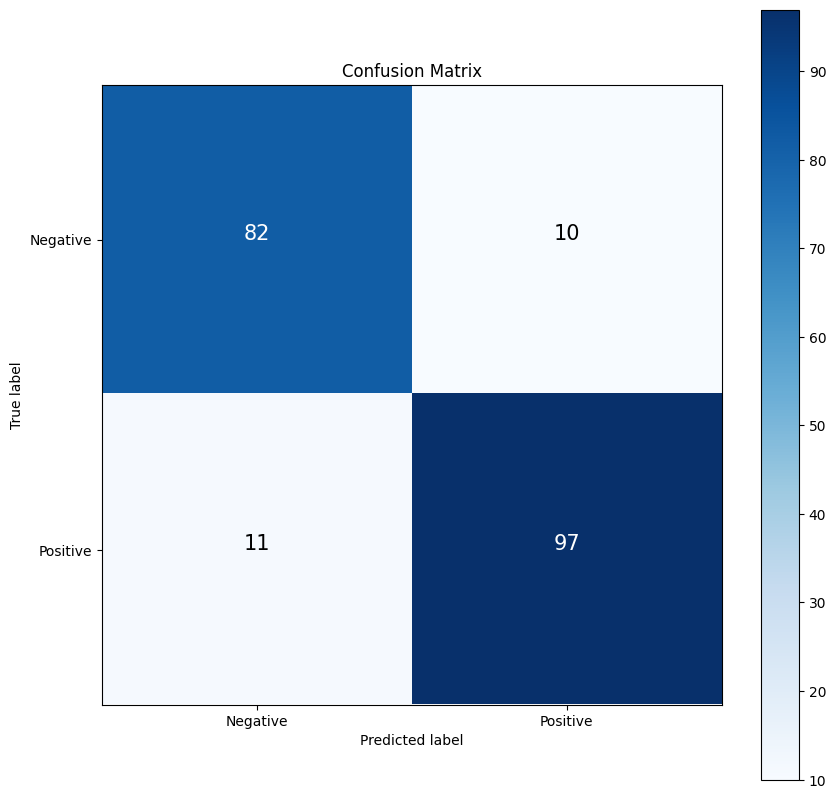

In [29]:
make_confusion_matrix(y_true=y_test,y_pred=pred,classes=classes)

<AxesSubplot: >

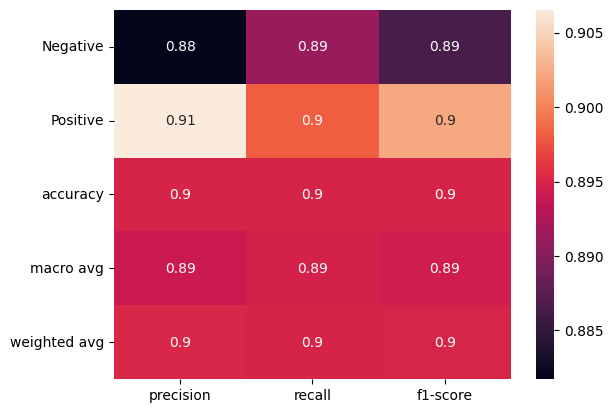

In [30]:
clf_report=classification_report(y_pred=pred,y_true=y_test,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

Main Model (data is preprossed)

In [31]:
main_accuracy=cross_val_score(model0, X_train_modified, y_train_modified, cv=10)
np.mean(main_accuracy)*100


82.5

In [32]:
model0.fit(X_train_modified, y_train_modified)
pred=model0.predict(X_test_modified)
model0_main_score=modelscore2(y_true=y_test_modified,y_pred=pred,average="binary")
model0_main_score


{'Accuracy': 90.0,
 'f1-score': 0.9065420560747663,
 'Recall': 0.8981481481481481,
 'Precision': 0.9150943396226415}

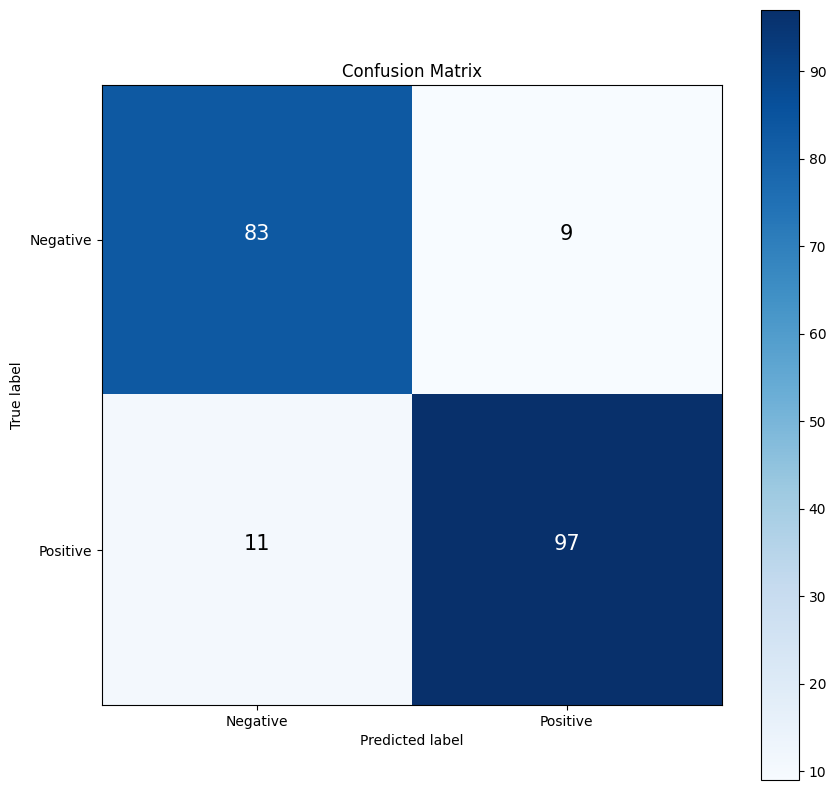

In [33]:
make_confusion_matrix(y_true=y_test_modified,y_pred=pred,classes=classes)

<AxesSubplot: >

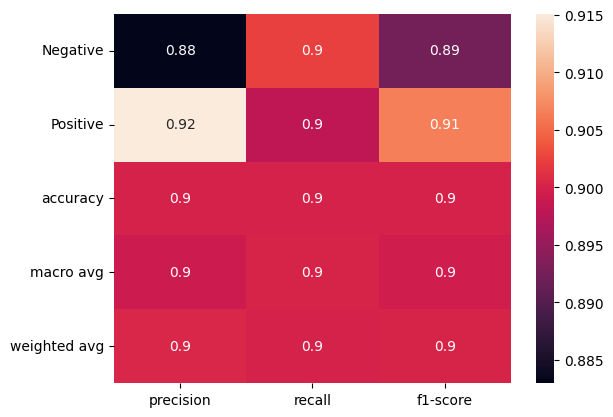

In [34]:
clf_report=classification_report(y_pred=pred,y_true=y_test_modified,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

<b><h1>Model 1 Naive Bais

Baseline

In [35]:
model1=make_pipeline(StandardScaler(),GaussianNB())


In [36]:
baseline_accuracy=cross_val_score(model1, X_train, y_train, cv=10)
print(f"The Baseline Accuracy of Gaussian Naive Bayes Model is {np.mean(baseline_accuracy)*100:.2f}")

The Baseline Accuracy of Gaussian Naive Bayes Model is 52.00


In [37]:
model1.fit(X_train, y_train)
pred=model1.predict(X_test)
model1_baseline_score=modelscore2(y_true=y_test,y_pred=pred,average="binary")
model1_baseline_score

{'Accuracy': 52.0,
 'f1-score': 0.6712328767123288,
 'Recall': 0.9074074074074074,
 'Precision': 0.532608695652174}

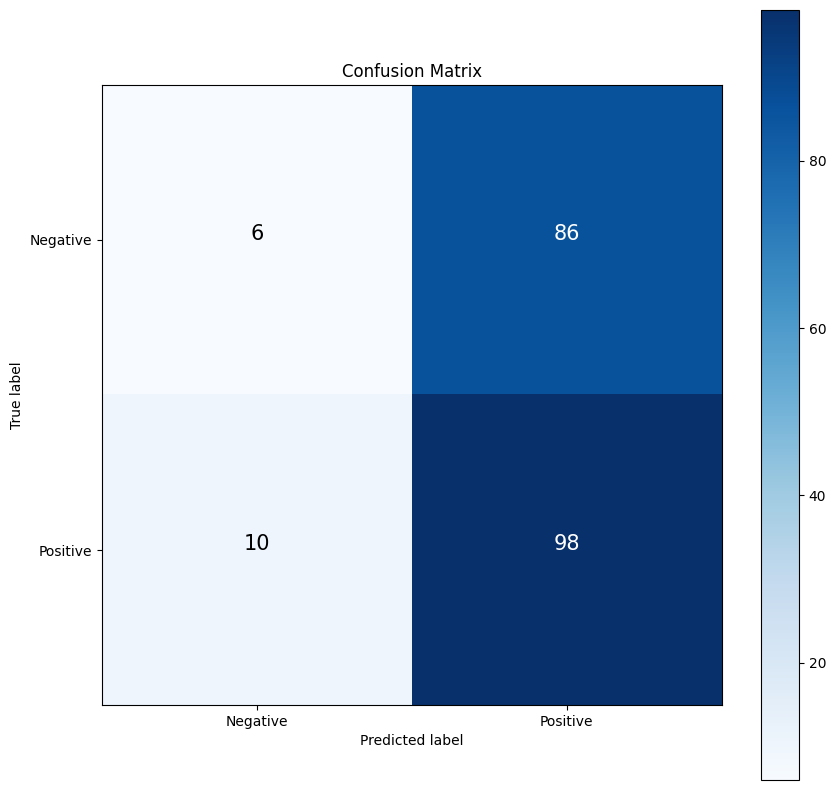

In [38]:
make_confusion_matrix(y_true=y_test,y_pred=pred,classes=classes)

<AxesSubplot: >

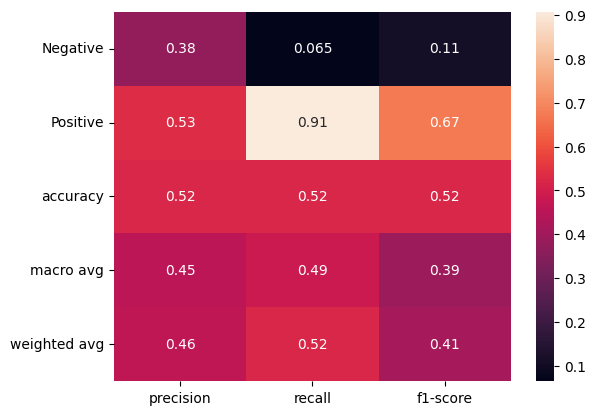

In [39]:
clf_report=classification_report(y_pred=pred,y_true=y_test,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

Main

In [40]:
acc=cross_val_score(model1, X_train_modified, y_train_modified, cv=10)
np.mean(acc)*100

55.75

In [41]:
model1.fit(X_train_modified, y_train_modified)
pred=model1.predict(X_test_modified)
model1_main_score=modelscore2(y_true=y_test_modified,y_pred=pred,average="binary")
model1_main_score

{'Accuracy': 61.0,
 'f1-score': 0.7234042553191489,
 'Recall': 0.9444444444444444,
 'Precision': 0.5862068965517241}

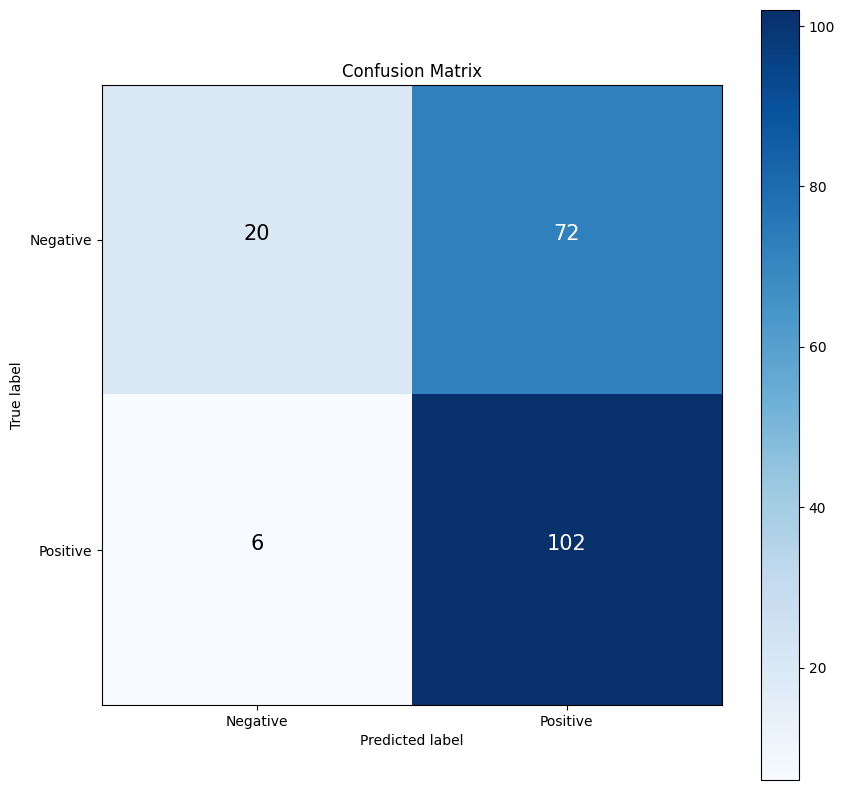

In [42]:
make_confusion_matrix(y_true=y_test_modified,y_pred=pred,classes=classes)

<AxesSubplot: >

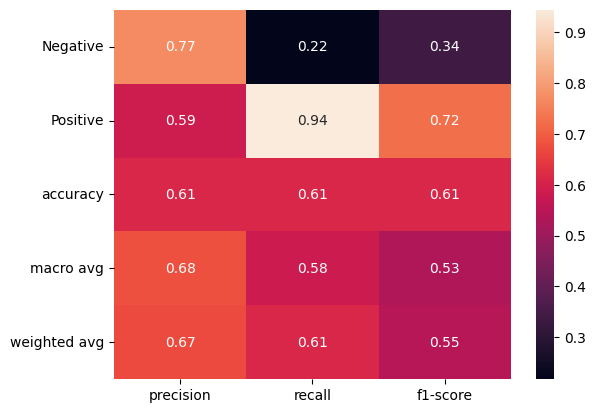

In [43]:
clf_report=classification_report(y_pred=pred,y_true=y_test_modified,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

<b><h1>Model 2 XGBoost

Baseline

In [44]:
model2=make_pipeline(StandardScaler(),xgb.XGBClassifier(objective="binary:logistic", random_state=42))

In [45]:
acc=cross_val_score(model2, X_train, y_train, cv=10)

print(f"The Baseline Accuracy of XGBoost Model is {np.mean(acc)*100:.2f}")

The Baseline Accuracy of XGBoost Model is 89.00


In [46]:
model2.fit(X_train, y_train)
pred=model2.predict(X_test)
model2_baseline_score=modelscore2(y_true=y_test,y_pred=pred,average="binary")
model2_baseline_score

{'Accuracy': 92.5,
 'f1-score': 0.9308755760368663,
 'Recall': 0.9351851851851852,
 'Precision': 0.926605504587156}

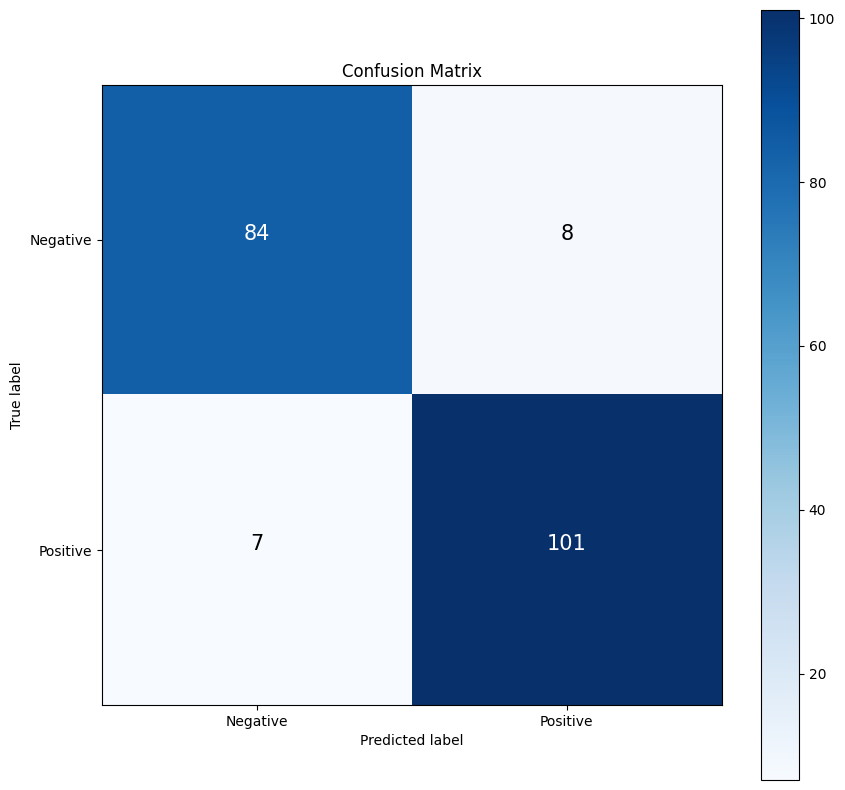

In [47]:
make_confusion_matrix(y_true=y_test,y_pred=pred,classes=classes)

<AxesSubplot: >

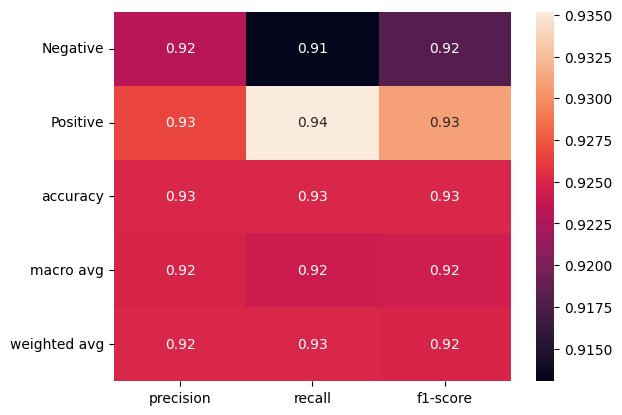

In [48]:
clf_report=classification_report(y_pred=pred,y_true=y_test,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

Main

In [49]:
model2_1=make_pipeline(StandardScaler(),xgb.XGBClassifier(objective="binary:logistic", random_state=42))

In [50]:
acc=cross_val_score(model2_1, X_train_modified, y_train_modified, cv=10)
np.mean(acc)*100

88.25

In [51]:
model2_1.fit(X_train_modified, y_train_modified)
pred=model2_1.predict(X_test_modified)
model2_main_score=modelscore2(y_true=y_test_modified,y_pred=pred,average="binary")
model2_main_score

{'Accuracy': 92.0,
 'f1-score': 0.9266055045871558,
 'Recall': 0.9351851851851852,
 'Precision': 0.9181818181818182}

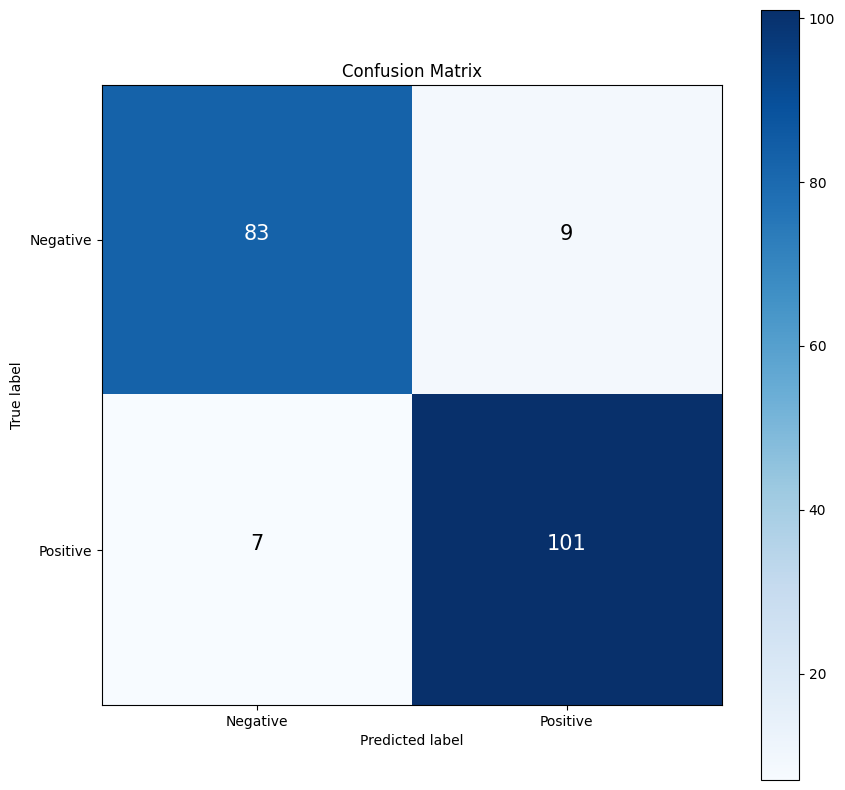

In [52]:
make_confusion_matrix(y_true=y_test_modified,y_pred=pred,classes=classes)

<AxesSubplot: >

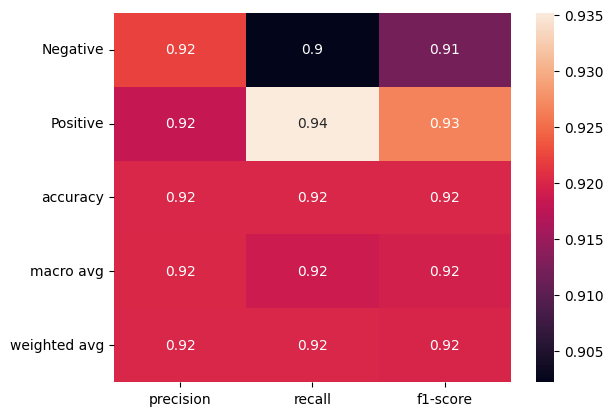

In [53]:
clf_report=classification_report(y_pred=pred,y_true=y_test_modified,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

<b><h1>Model 3 SVM

Baseline

In [54]:
model3=make_pipeline(StandardScaler(),SVC(gamma='auto'))



In [55]:
acc=cross_val_score(model3, X_train, y_train, cv=10)

print(f"The Baseline Accuracy of SVM Model is {np.mean(acc)*100:.2f}")

The Baseline Accuracy of SVM Model is 69.88


In [56]:
model3.fit(X_train, y_train)
pred=model3.predict(X_test)
model3_baseline_score=modelscore2(y_true=y_test,y_pred=pred,average="binary")
model3_baseline_score

{'Accuracy': 74.0,
 'f1-score': 0.7450980392156864,
 'Recall': 0.7037037037037037,
 'Precision': 0.7916666666666666}

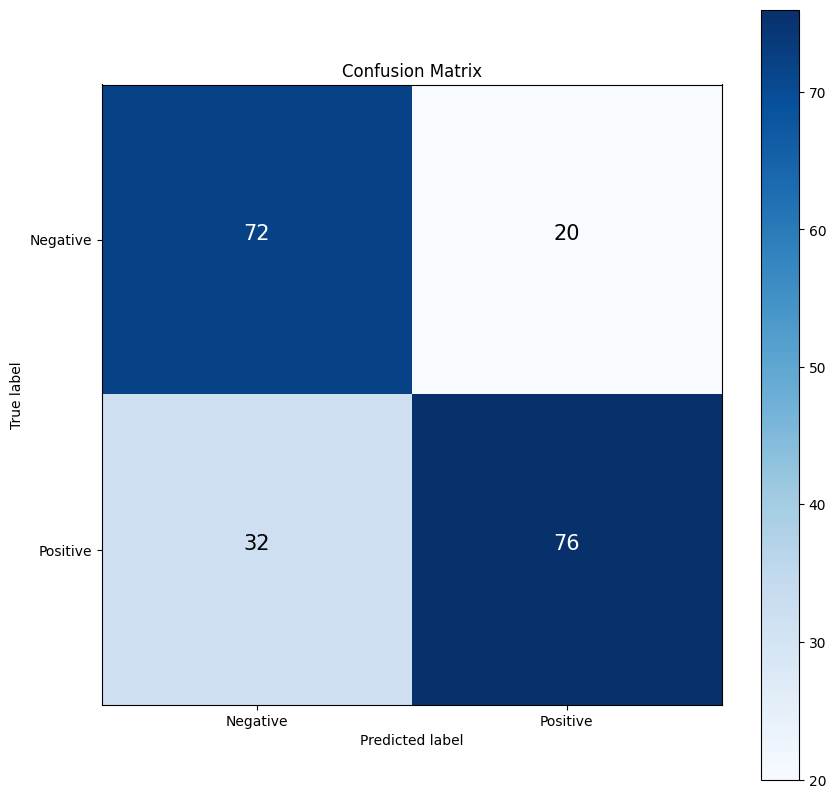

In [57]:
make_confusion_matrix(y_true=y_test,y_pred=pred,classes=classes)

<AxesSubplot: >

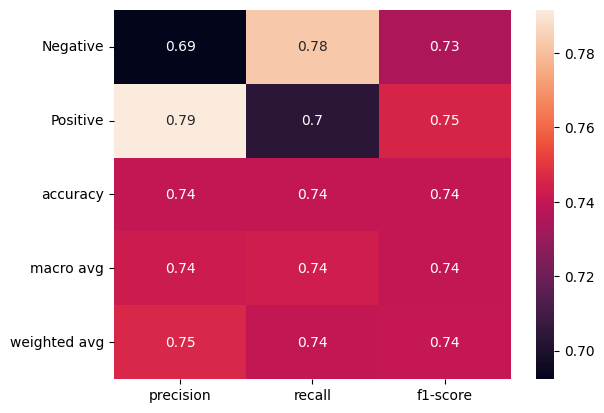

In [58]:
clf_report=classification_report(y_pred=pred,y_true=y_test,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

Main

In [59]:
acc=cross_val_score(model3, X_train_modified, y_train_modified, cv=10)
np.mean(acc)*100

72.75

In [60]:
model3.fit(X_train_modified, y_train_modified)
pred=model3.predict(X_test_modified)
model3_main_score=modelscore2(y_true=y_test_modified,y_pred=pred,average="binary")
model3_main_score

{'Accuracy': 78.5,
 'f1-score': 0.7902439024390243,
 'Recall': 0.75,
 'Precision': 0.8350515463917526}

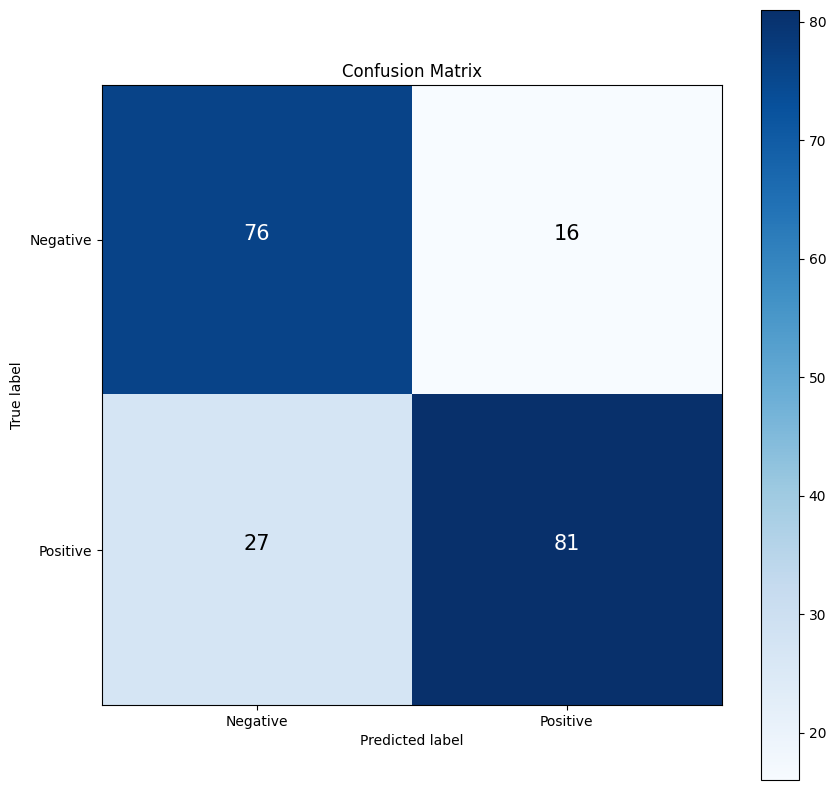

In [61]:
make_confusion_matrix(y_true=y_test_modified,y_pred=pred,classes=classes)

<AxesSubplot: >

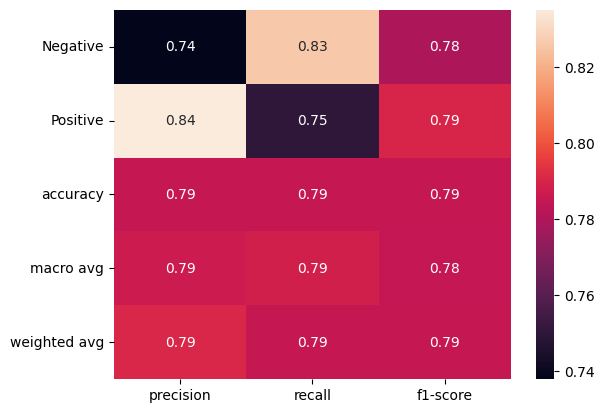

In [62]:
clf_report=classification_report(y_pred=pred,y_true=y_test_modified,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

<h3><b>Model 4 KNN

In [63]:
model4 = KNeighborsClassifier(n_neighbors=5)

Baseline KNN model

In [64]:
acc=cross_val_score(model4, X_train, y_train, cv=10)

print(f"The Baseline Accuracy of SVM Model is {np.mean(acc)*100:.2f}")

The Baseline Accuracy of SVM Model is 66.38


In [65]:
model4.fit(X_train, y_train)
pred=model4.predict(X_test)
model4_baseline_score=modelscore2(y_true=y_test,y_pred=pred,average="binary")
model4_baseline_score

{'Accuracy': 69.5,
 'f1-score': 0.7109004739336493,
 'Recall': 0.6944444444444444,
 'Precision': 0.7281553398058253}

Main Model

In [66]:
acc=cross_val_score(model4, X_train_modified, y_train_modified, cv=10)
np.mean(acc)*100

66.24999999999999

In [67]:
model4.fit(X_train_modified, y_train_modified)
pred=model4.predict(X_test_modified)
model4_main_score=modelscore2(y_true=y_test_modified,y_pred=pred,average="binary")
model4_main_score

{'Accuracy': 69.5,
 'f1-score': 0.7109004739336493,
 'Recall': 0.6944444444444444,
 'Precision': 0.7281553398058253}

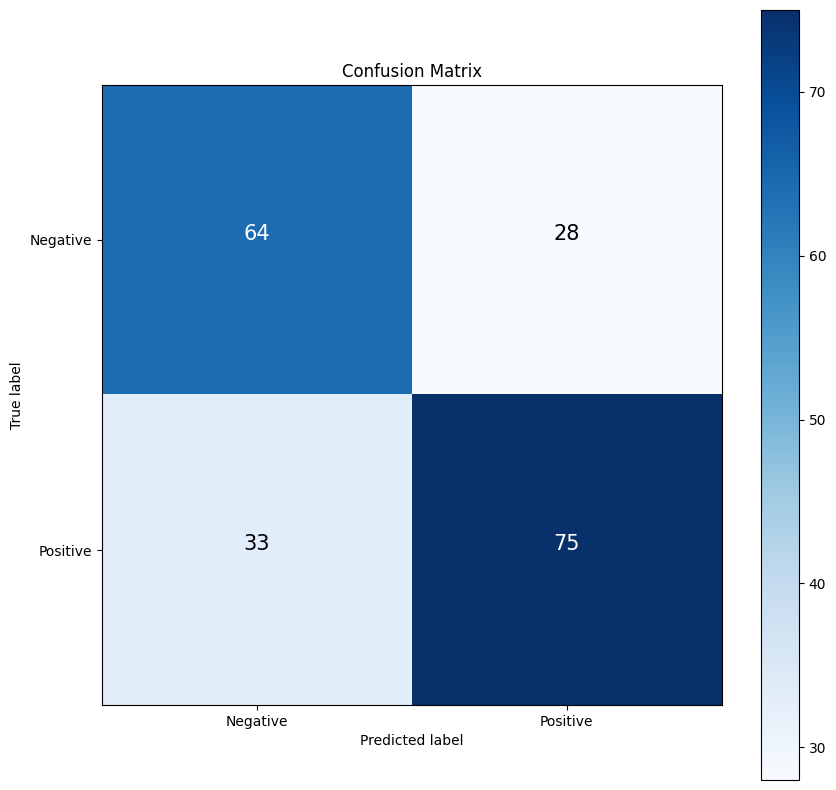

In [68]:
make_confusion_matrix(y_true=y_test_modified,y_pred=pred,classes=classes)

<AxesSubplot: >

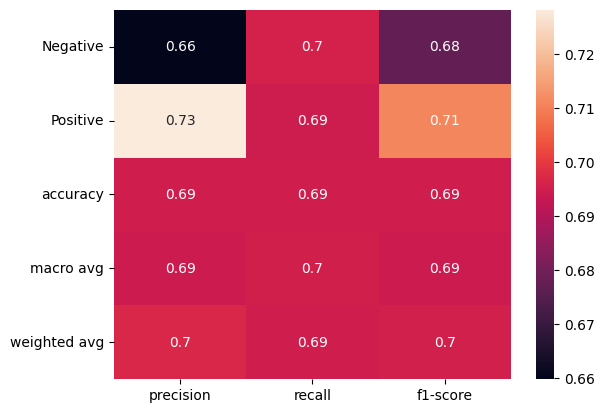

In [69]:
clf_report=classification_report(y_pred=pred,y_true=y_test_modified,
                                   output_dict=True,target_names=classes)
clf_report=pd.DataFrame(clf_report)
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True)

<b><h1>Comparision

In [70]:
score_baseline={"Random Forest Model(Baseline)":model0_baseline_score,"Gaussian Naive Bayes Model(baseline)":model1_baseline_score,"XGBoost Model(Basline)":model2_baseline_score,"SVM Model(Baseline)":model3_baseline_score,"KNN Model (Baseline)":model4_baseline_score}
score_baseline=pd.DataFrame.from_dict(score_baseline, orient='index')
highlighted_score = score_baseline.style.highlight_max(color="blue").highlight_min(color="red")
highlighted_score.set_caption("Lowest values in red, highest values in blue")
display(highlighted_score)



,Accuracy,f1-score,Recall,Precision
Random Forest Model(Baseline),89.500000,0.902326,0.898148,0.906542
Gaussian Naive Bayes Model(baseline),52.000000,0.671233,0.907407,0.532609
XGBoost Model(Basline),92.500000,0.930876,0.935185,0.926606
SVM Model(Baseline),74.000000,0.745098,0.703704,0.791667
KNN Model (Baseline),69.500000,0.710900,0.694444,0.728155


In [71]:
score_main={"Random Forest Model":model0_main_score,"Gaussian Naive Bayes":model1_main_score,"XGBoost Model":model2_main_score,"SVM Model":model3_main_score,"KNN Model":model4_main_score}
score_main=pd.DataFrame.from_dict(score_main, orient='index')
highlighted_score = score_main.style.highlight_max(color="blue").highlight_min(color="red")
highlighted_score.set_caption("Lowest values in red, highest values in blue")
display(highlighted_score)



,Accuracy,f1-score,Recall,Precision
Random Forest Model,90.000000,0.906542,0.898148,0.915094
Gaussian Naive Bayes,61.000000,0.723404,0.944444,0.586207
XGBoost Model,92.000000,0.926606,0.935185,0.918182
SVM Model,78.500000,0.790244,0.750000,0.835052
KNN Model,69.500000,0.710900,0.694444,0.728155


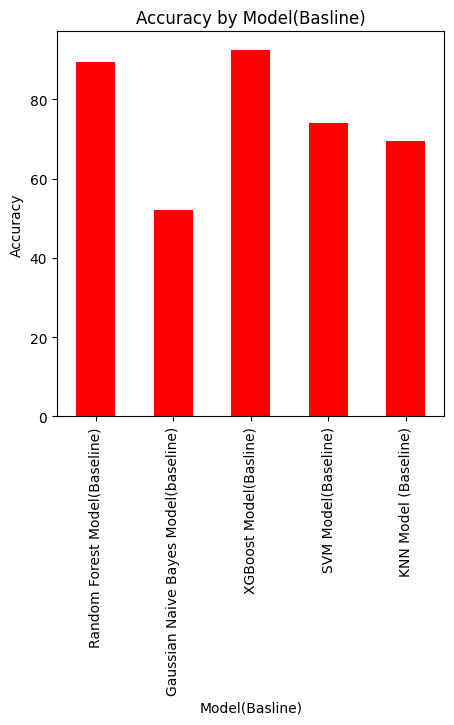

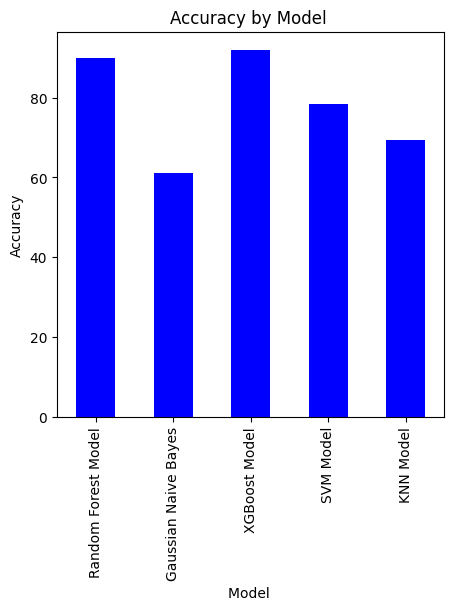

In [72]:
ax = score_baseline['Accuracy'].plot(kind='bar', figsize=(5,5), color='red')
ax.set_title('Accuracy by Model(Basline)')
ax.set_xlabel('Model(Basline)')
ax.set_ylabel('Accuracy')
plt.show()

ax = score_main['Accuracy'].plot(kind='bar', figsize=(5,5), color='blue')
ax.set_title('Accuracy by Model ')
ax.set_xlabel('Model ')
ax.set_ylabel('Accuracy')
plt.show()


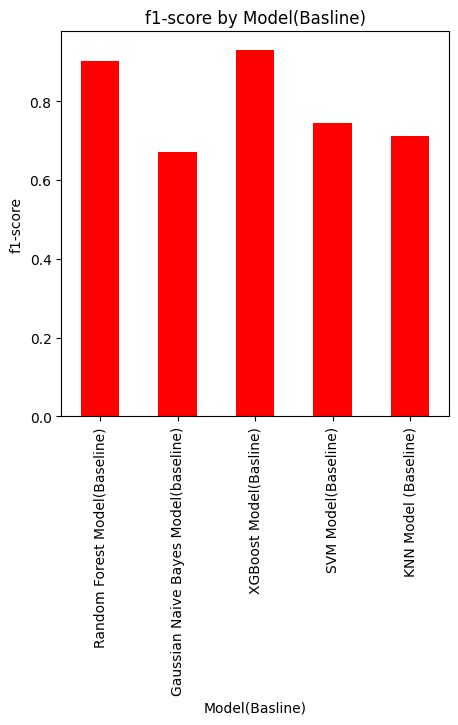

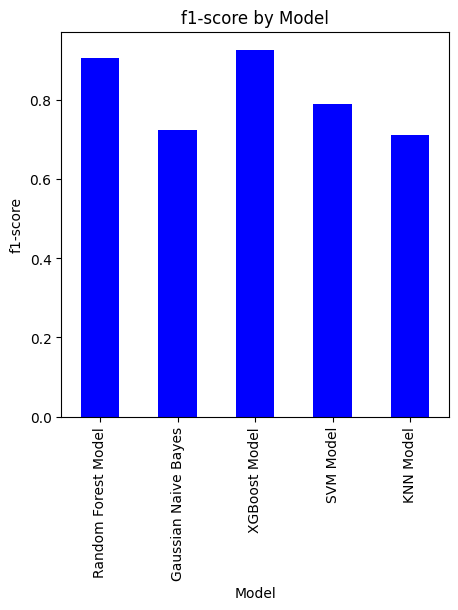

In [73]:
ax = score_baseline['f1-score'].plot(kind='bar', figsize=(5,5), color='red')
ax.set_title('f1-score by Model(Basline)')
ax.set_xlabel('Model(Basline)')
ax.set_ylabel('f1-score')
plt.show()

ax = score_main['f1-score'].plot(kind='bar', figsize=(5,5), color='blue')
ax.set_title('f1-score by Model')
ax.set_xlabel('Model')
ax.set_ylabel('f1-score')
plt.show()


<h1><b>Test Data

In [74]:
test_data=pd.read_csv("CE802_P2_Test.csv")

In [75]:
test_data=test_data.drop('Class',axis=1)

In [76]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(test_data)
imputed_data = pd.DataFrame(imputed_data, columns=test_data.columns)


In [78]:
test_pred=model2.predict(imputed_data)

In [79]:
test_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,

### Part B

In [80]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

predicted = test_pred # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted
test_df["Class"] = test_df["Class"].replace({1: 'TRUE', 0: 'FALSE'})

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')


# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

C:\Users\priya\AppData\Local\Temp\ipykernel_22112\1403690967.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df.iloc[:,-1] = predicted
